# Week 2: Analyzing Overnight Parking Districts Data

I begin by importing geopandas so the system knows how to make sense of what I'm telling it.

In [1]:
import geopandas as gpd

Below, I import the file. As you may or may not be able to see based on the number of steps, it took me a while to get it work!

In [11]:
opds = gpd.read_file('data/LADOT_Overnight_Parking_Districts.geojson')

First, let's run `.shape` and see generally what we're working with.

In [12]:
opds.shape

(40, 3)

Okay, so there are 40 rows and 3 columns.

Next, let's run `.info` and see all the entries.

In [14]:
opds.info

<bound method DataFrame.info of     opdname opdnum                                           geometry
0   ALABAMA    500  MULTIPOLYGON (((-118.59891 34.21548, -118.5988...
1   OPD 501    501  MULTIPOLYGON (((-118.36135 34.15619, -118.3576...
2   OPD 502    502  MULTIPOLYGON (((-118.40790 34.03322, -118.4073...
3   OPD 503    503  MULTIPOLYGON (((-118.44854 34.16421, -118.4448...
4   OPD 504    504  MULTIPOLYGON (((-118.40524 34.19394, -118.4026...
5   OPD 505    505  MULTIPOLYGON (((-118.43210 34.02473, -118.4314...
6   OPD 506    506  MULTIPOLYGON (((-118.41990 34.01166, -118.4200...
7   OPD 507    507  MULTIPOLYGON (((-118.25538 34.07986, -118.2545...
8   OPD 508    508  MULTIPOLYGON (((-118.56004 34.26470, -118.5595...
9   OPD 509    509  MULTIPOLYGON (((-118.61208 34.25732, -118.6122...
10  OPD 510    510  MULTIPOLYGON (((-118.57139 34.22450, -118.5710...
11  OPD 512    512  MULTIPOLYGON (((-118.51020 34.18003, -118.5095...
12  OPD 513    513  MULTIPOLYGON (((-118.48442 34.22178, -

Wow, that's a lot of OPD districts! This town must really have issues with late night traffic. Or maybe...

Hmm, let's save such dangerous thoughts for another time. Let's play with `.head()` and see the first five entries.

In [16]:
opds.head()

,opdname,opdnum,geometry
0,ALABAMA,500,"MULTIPOLYGON (((-118.59891 34.21548, -118.5988..."
1,OPD 501,501,"MULTIPOLYGON (((-118.36135 34.15619, -118.3576..."
2,OPD 502,502,"MULTIPOLYGON (((-118.40790 34.03322, -118.4073..."
3,OPD 503,503,"MULTIPOLYGON (((-118.44854 34.16421, -118.4448..."
4,OPD 504,504,"MULTIPOLYGON (((-118.40524 34.19394, -118.4026..."


Okay, not much to see here, but it looks prettier.

Let's `.plot()` this out. I'll be curious to see if it knows how to make sense of polygons.

<AxesSubplot:>

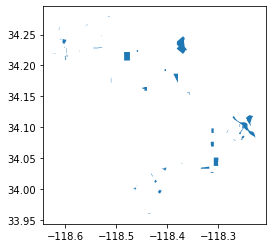

In [17]:
opds.plot()

Well, it's not the prettiest map I've ever made, but it's all there! And it did figure out how to plot polygons. I guess that's what's going on with the geomtry field?

For this second to last step, I'm supposed to show that I know how to use `.value_counts()`. This won't show much about this particular dataset, since each entry has distinct values, but here it goes.

In [19]:
opds['opdname'].value_counts()

ALABAMA    1
OPD 501    1
OPD 531    1
OPD 536    1
OPD 538    1
OPD 537    1
OPD 541    1
OPD 543    1
OPD 545    1
OPD 546    1
OPD 550    1
OPD 551    1
OPD 544    1
OPD 528    1
OPD 530    1
OPD 532    1
OPD 533    1
OPD 534    1
OPD 535    1
OPD 527    1
OPD 525    1
OPD 524    1
OPD 509    1
OPD 502    1
OPD 503    1
OPD 504    1
OPD 505    1
OPD 506    1
OPD 507    1
OPD 508    1
OPD 510    1
OPD 519    1
OPD 512    1
OPD 513    1
OPD 514    1
OPD 515    1
OPD 516    1
OPD 517    1
OPD 518    1
OPD 547    1
Name: opdname, dtype: int64

Right, so as expected, each OPD name has a value of one, since there wouldn't be much point to names that applied to multiple entries!

Okay, now I need to query the data. Let's try querying OPDs with an ID at or above 520. Let's check the data types first.

In [25]:
opds.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   opdname   40 non-null     object  
 1   opdnum    40 non-null     object  
 2   geometry  40 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.1+ KB


Okay, so as I feared, opdnum is registered as a string/object. Let's see if we can't change that.

In [27]:
opds["opdnum"] = opds["opdnum"].astype(str).astype(int)
opds.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   opdname   40 non-null     object  
 1   opdnum    40 non-null     int64   
 2   geometry  40 non-null     geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 1.1+ KB


Sweet, so now the **opdnum** field is an integer. Let's try to query it now.

In [30]:
opds.query("opdnum >= 520")

,opdname,opdnum,geometry
19,OPD 524,524,"MULTIPOLYGON (((-118.51642 34.27967, -118.5124..."
20,OPD 525,525,"MULTIPOLYGON (((-118.46301 34.00244, -118.4612..."
21,OPD 527,527,"MULTIPOLYGON (((-118.25761 34.10052, -118.2590..."
22,OPD 531,531,"MULTIPOLYGON (((-118.31356 34.09077, -118.3135..."
23,OPD 536,536,"MULTIPOLYGON (((-118.45787 34.22223, -118.4595..."
24,OPD 538,538,"MULTIPOLYGON (((-118.37289 34.04216, -118.3708..."
25,OPD 537,537,"MULTIPOLYGON (((-118.30903 34.05082, -118.3074..."
26,OPD 541,541,"MULTIPOLYGON (((-118.41067 34.03341, -118.4104..."
27,OPD 543,543,"MULTIPOLYGON (((-118.28105 34.09569, -118.2802..."
28,OPD 545,545,"MULTIPOLYGON (((-118.33381 34.03449, -118.3301..."


Cool, that worked. The query produced any entry with an **openum** above 520.